# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) #expected output "2.4.0"

2.4.0


If the version is less than 2.0 run the cell below

In [ ]:
!pip install tensorflow

#Load Dataset

In [4]:
mnist_fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist_fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploring the Data

We will be printing the shape our dataset to see what type of images we have in our dataset along with labels

In [5]:
print("shape of training dataset ",train_images.shape)
print("Number of lables ",len(train_labels))
print("Labels :",train_labels)
print("Shape of test dataset ",test_images.shape)
print("Examples in test: ",len(test_labels))

shape of training dataset  (60000, 28, 28)
Number of lables  60000
Labels : [9 0 0 ... 3 0 5]
Shape of test dataset  (10000, 28, 28)
Examples in test:  10000


# Visulaizing Data

Here is some plotting code to display our images from the dataset. <br>
Change index variable to move around in the dataset

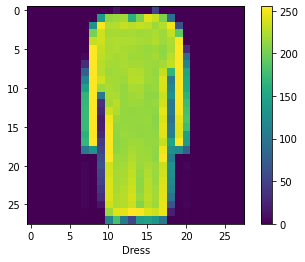

In [7]:
index = 25
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[index]])
plt.show()

We normalize our data

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

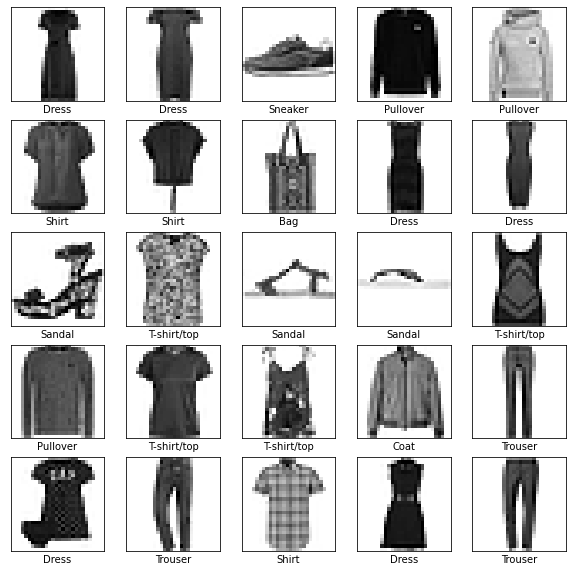

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+50], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+50]])
plt.show()

# The model

We will design a network in tensorflow using the Sequential API. <br>
It will be a netwrok with an input layer of shape 28*28 i.e. 786 features corresponding to each pixel of our 28x28 images. <br>
We use flatten layer to convert to a 1D layer. <br>
Dense layers are the trainable ones. <br>

## Architecture

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

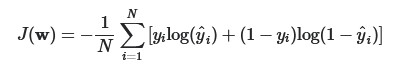


In [11]:
? tf.keras.Sequential

In [12]:
? tf.keras.layers.Flatten

In [13]:
? tf.keras.layers.Dense

## Optimizer

In [14]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [15]:
? tf.keras.optimizers.SGD

In [16]:
model.compile(optimizer = opt,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [17]:
? tf.keras.losses.SparseCategoricalCrossentropy

## Training

In [19]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1513 - accuracy: 0.6385
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5291 - accuracy: 0.8157
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4704 - accuracy: 0.8355
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4357 - accuracy: 0.8491
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4194 - accuracy: 0.8524
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3935 - accuracy: 0.8640
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3862 - accuracy: 0.8627
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3683 - accuracy: 0.8702
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3631 - accuracy: 0.8707
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.354

In [18]:
?model.fit

## Evaluating

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3952 - accuracy: 0.8618

Test accuracy: 0.8618000149726868


In [20]:
? model.evaluate

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [23]:
predictions = model.predict(test_images)
predictions[0]

array([2.0161218e-05, 2.7947294e-06, 1.0620822e-05, 3.4596225e-05,
       1.5181811e-05, 5.6009106e-02, 3.6012381e-05, 4.7792677e-02,
       5.2803583e-03, 8.9079845e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

# How did we perform

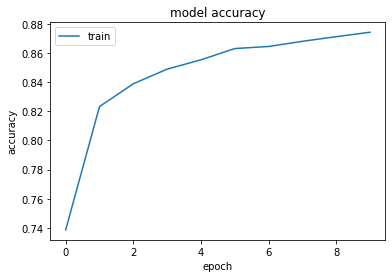

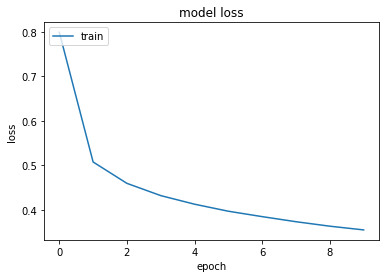

In [26]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()